# INFO 3401: Problem Set 5
Jason Kibozi-Yocka

# utils.py

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
def loadAndCleanData(file):
    dataset = pd.read_csv(file, encoding='utf-8')
    dataset.fillna(value=0, inplace=True)
    # this next line was taken from https://stackoverflow.com/questions/22649693/drop-rows-with-all-zeros-in-pandas-data-frame
    dataset = dataset.loc[(dataset!=0).any(axis=1)] # this lets me drop rows where all values are 0
    return dataset

In [3]:
# Problem Set 5: Problem 8
def mergeData(dataset1, dataset2, columnList):
    dataset = dataset1.merge(dataset2, on=columnList)
    return dataset

In [4]:
# Problem Set 5: Problem 10
def plotTimeline(dataset, time_col, val_col):
    sns.lineplot(data=dataset, x=time_col, y=val_col)
    plt.show()

In [36]:
# Problem Set 5: Problem 12
def plotMultipleTimelines(dataset, time_col, val_col):
    colors=['red','orange','yellow','green','blue','purple','pink','brown']
    for i in range(len(val_col)):
        sns.lineplot(data=dataset[i], x=time_col, y=val_col[i], color=colors[i])
    plt.show()

# covid.py

In [6]:
# Problem Set 5: Problem 4 / Problem 6
def correctDateFormat(dataset,columnName):
    dataset = dataset.melt(id_vars=dataset.columns[0:4], var_name="Date", value_name=columnName)
    dataset["Date"] = pd.to_datetime(dataset["Date"])
    return dataset

In [7]:
# Problem Set 5: Problem 14
def aggregateCountry(dataset, target, country):
    temp_data = dataset.pivot_table(values=target, index='Date', columns='Country/Region', aggfunc='first')
    return pd.DataFrame(temp_data[country])

In [8]:
# Problem Set 5: Problem 15
def topCorrelations(dataset, target, number):
    dataset2 = dataset.pivot_table(values=target, index='Date', columns='Country/Region', aggfunc='first')
    for country in dataset2.columns:
        if dataset2[country][-1] < 500:
            dataset2.drop(country,axis='columns',inplace=True)
    dataset2 = dataset2.corr()
    countries  = dataset2.columns
    repeatList = []
    repeatList2 = []

    for country1 in countries:
        for country2 in countries:
            if country1 != country2:
                if [country1,country2] not in repeatList and [country2,country1] not in repeatList:
                    repeatList.append([country1,country2])
                    repeatList2.append(dataset2[country1][country2])
    
    dataset3 = pd.DataFrame(list(zip(repeatList,repeatList2)), columns=['Pairs','Corr'])
    dataset3.sort_values(by='Corr',inplace=True, ascending=False)
    return(dataset3.iloc[:number])

# main.py

In [9]:
# Problem Set 5: Problem 3
df_confirmed = loadAndCleanData("COVID-19/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv")

In [10]:
# Problem Set 5: Problem 5
df_confirmed = correctDateFormat(df_confirmed, "Confirmed")

In [11]:
# Problem Set 5: Problem 7
df_deaths = loadAndCleanData("COVID-19/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv")
df_deaths = correctDateFormat(df_deaths, "Deaths")

df_recovered = loadAndCleanData("COVID-19/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv")
df_recovered = correctDateFormat(df_recovered, "Recovered")

In [12]:
# Problem Set 5: Problem 9
df = mergeData(df_confirmed, df_deaths, list(df_confirmed.columns)[:-1])
df = mergeData(df, df_recovered, list(df_confirmed.columns)[:-1])

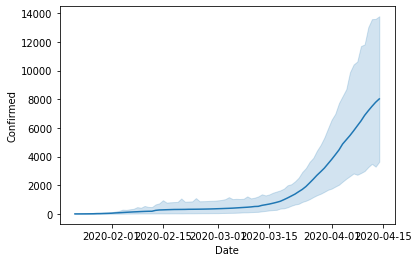

In [13]:
# Problem Set 5: Problem 11
plotTimeline(df, "Date", "Confirmed")

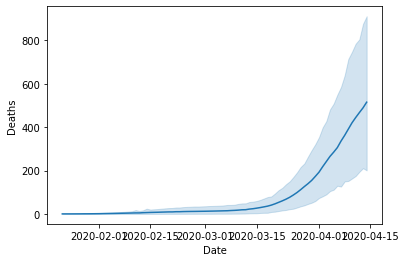

In [14]:
plotTimeline(df, "Date", "Deaths")

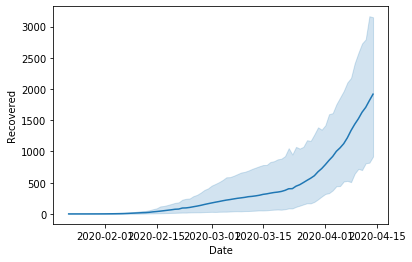

In [15]:
plotTimeline(df, "Date", "Recovered")

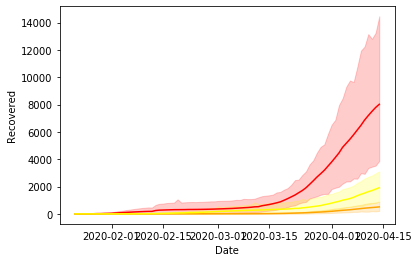

In [37]:
# Problem Set 5: Problem 13
plotMultipleTimelines([df,df,df], "Date", ["Confirmed", "Deaths", "Recovered"])

In [17]:
# Problem Set 5: Problem 16
topCorrelations(df, "Confirmed", 5)

,Pairs,Corr
2182,"[Germany, Spain]",0.999780
1746,"[Czechia, Germany]",0.999771
1790,"[Czechia, Spain]",0.999660
3117,"[Morocco, Romania]",0.999574
849,"[Belgium, Portugal]",0.999563


In [18]:
cList = ['Germany', 'Spain', 'Czechia', 'Morocco', 'Romania', 'Belgium', 'Portugal']
for i in range(len(cList)):
        cList[i] = df[df["Country/Region"] == cList[i]].reset_index()

In [19]:
topCorrelations(df, "Deaths", 5)

,Pairs,Corr
54,"[Turkey, US]",0.999373
9,"[Belgium, US]",0.999360
18,"[Brazil, US]",0.999098
0,"[Belgium, Brazil]",0.998661
8,"[Belgium, Turkey]",0.998249


In [20]:
dList = ['Turkey', 'US', 'Belgium', 'Brazil']
for i in range(len(dList)):
        dList[i] = df[df["Country/Region"] == dList[i]].reset_index()

In [21]:
topCorrelations(df, "Recovered", 5)

,Pairs,Corr
169,"[Belgium, Spain]",0.999191
655,"[Poland, Turkey]",0.998886
411,"[Iceland, Malaysia]",0.998441
378,"[Germany, Iceland]",0.997836
235,"[Chile, Turkey]",0.997776


In [22]:
tList = ['Belgium', 'Spain', 'Poland', 'Turkey', 'Iceland', 'Malaysia', 'Germany','Chile']
for i in range(len(tList)):
        tList[i] = df[df["Country/Region"] == tList[i]].reset_index()

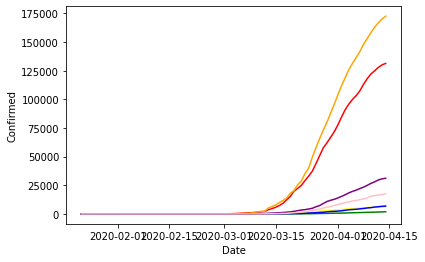

In [38]:
# Problem Set 5: Problem 17
plotMultipleTimelines(cList, "Date", ["Confirmed","Confirmed","Confirmed","Confirmed","Confirmed","Confirmed","Confirmed"])

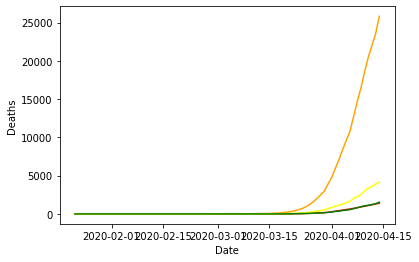

In [39]:
plotMultipleTimelines(dList, "Date", ["Deaths","Deaths","Deaths","Deaths"])

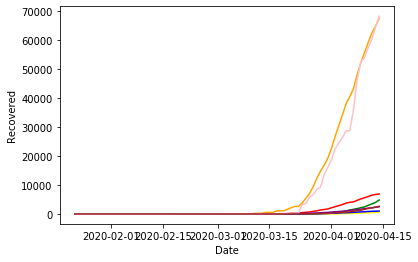

In [40]:
plotMultipleTimelines(tList, "Date", ["Recovered","Recovered","Recovered","Recovered","Recovered","Recovered","Recovered","Recovered"])